In [3]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np  

import seaborn as sns

import pandas as pd

2025-02-08 15:56:55.730770: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-08 15:56:56.095590: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-08 15:56:56.283923: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739030216.432746    9909 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739030216.489897    9909 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-08 15:56:56.900997: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes = [0,1,2,3,4,5,6,7,8,9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-08 15:58:49.532343: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images, y=train_labels, epochs=10,
          validation_data=(test_images, test_labels))

Epoch 1/10


2025-02-08 15:59:33.011304: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8992 - loss: 0.3344

2025-02-08 16:00:02.188900: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8993 - loss: 0.3341 - val_accuracy: 0.9850 - val_loss: 0.0496
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9849 - loss: 0.0488 - val_accuracy: 0.9890 - val_loss: 0.0337
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 0.9891 - loss: 0.0338 - val_accuracy: 0.9907 - val_loss: 0.0278
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 16ms/step - accuracy: 0.9929 - loss: 0.0234 - val_accuracy: 0.9914 - val_loss: 0.0267
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9941 - loss: 0.0180 - val_accuracy: 0.9898 - val_loss: 0.0356
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.9953 - loss: 0.0146 - val_accuracy: 0.9888 - val_loss: 0.0447
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 18ms/step - accuracy: 0.9961 - loss: 0.0117 - val_accuracy: 0.9913 - val_loss: 0.0314
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9974 - loss: 0.00

In [39]:
y_true = test_labels
y_pred_score = model.predict(test_images)
y_pred = np.argmax(y_pred_score, axis=1)


 10/313 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step 

 17/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

2025-02-08 16:27:29.358566: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


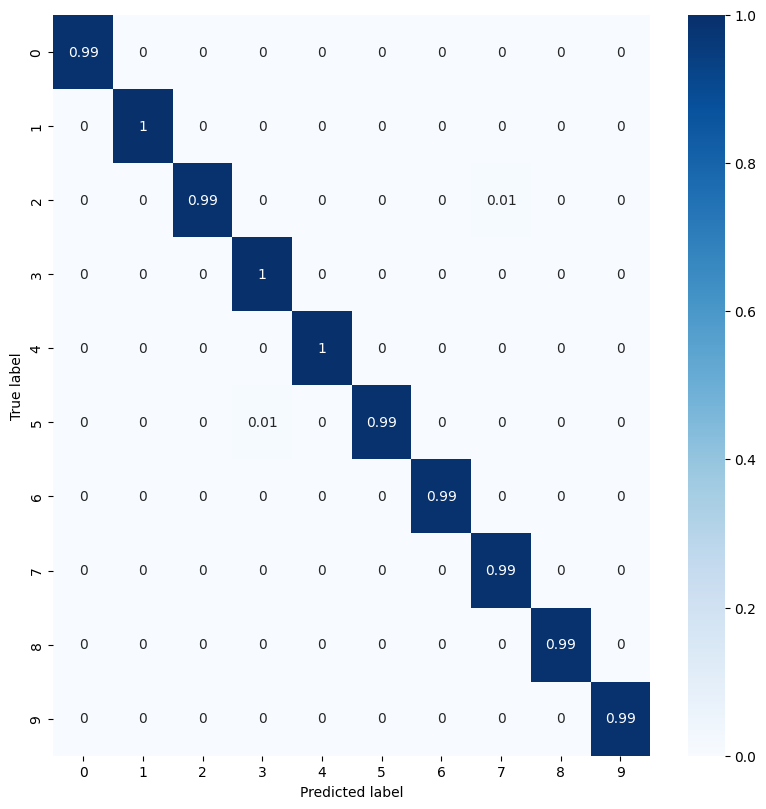

In [23]:
conf_matrix = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
conf_matrix_norm = np.around(conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis], decimals=2)

conf_matrix_df = pd.DataFrame(conf_matrix_norm,
                                index = classes, 
                                columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Cálculos de validação de desempenho

In [24]:
# extraindo os valores da matriz de confusão
VP = np.diag(conf_matrix)
FP = conf_matrix.sum(axis=0) - VP
FN = conf_matrix.sum(axis=1) - VP
VN = conf_matrix.sum() - (FP + FN + VP)

## Sensibilidade

In [25]:
sensitivity = VP / (VP + FN)

print('Sensitivity: ', sensitivity)

Sensitivity:  [0.99285714 0.99735683 0.98643411 0.9960396  0.99592668 0.98878924
 0.99060543 0.9922179  0.99383984 0.9851338 ]


## Especificidade

In [26]:
specificity = VN / (VN + FP)

print('Specificity: ', specificity)

Specificity:  [0.99922395 0.99887197 0.99944246 0.99866518 0.99955644 0.99912165
 0.99922583 0.99855105 0.99922446 0.99922144]


## Acurácia

In [27]:
accuracy = (VP + VN) / (VP + VN + FP + FN)

print('Accuracy: ', accuracy)

Accuracy:  [0.9986 0.9987 0.9981 0.9984 0.9992 0.9982 0.9984 0.9979 0.9987 0.9978]


## Precisão

In [28]:
precision = VP / (VP + FP)

print('Precision: ', precision)

Precision:  [0.99285714 0.99124343 0.99511241 0.98821218 0.99592668 0.99101124
 0.99267782 0.9874153  0.99282051 0.99300699]


## F-Score

In [30]:
f_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

print('F-Score: ', f_score)

F-Score:  [0.99285714 0.99429073 0.99075426 0.99211045 0.99592668 0.98989899
 0.99164054 0.98981077 0.99332991 0.98905473]


## Curva de ROC

In [49]:
from sklearn.metrics import auc, roc_curve

y_scores = y_pred_score[:, 4]

fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2  
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)

ValueError: multiclass format is not supported